## **Flight Data Analysis**
### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
flight_df=pd.read_csv("goibibo_flights_data.csv")

In [4]:
flight_df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [49]:
## Understanding Data

In [6]:
rows=flight_df.shape[0]
columns=flight_df.shape[1]
print("Number of rows :",rows)
print("Number of columns :",columns)

Number of rows : 300261
Number of columns : 13


In [7]:
flight_df.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

In [8]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   flight date  300261 non-null  object 
 1   airline      300261 non-null  object 
 2   flight_num   300261 non-null  object 
 3   class        300261 non-null  object 
 4   from         300261 non-null  object 
 5   dep_time     300261 non-null  object 
 6   to           300261 non-null  object 
 7   arr_time     300261 non-null  object 
 8   duration     300261 non-null  object 
 9   price        300261 non-null  object 
 10  stops        300261 non-null  object 
 11  Unnamed: 11  0 non-null       float64
 12  Unnamed: 12  0 non-null       float64
dtypes: float64(2), object(11)
memory usage: 29.8+ MB


#### The dataset has no null values, but the data types need correction.

## **Data Preprocessing**

* Removing duplicates
* Changing the format of the data
* Creating new columns
* Splitting the columns
* Dropping less important columns

#### Deleting Duplicates

In [9]:
flight_df.duplicated().sum()

np.int64(2)

In [10]:
flight_df=flight_df.drop_duplicates()

In [11]:
flight_df.duplicated().sum()

np.int64(0)

In [12]:
flight_df.shape

(300259, 13)

In [13]:
flight_df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [14]:
flight_df=flight_df.iloc[:,:-2]

#### Converting  columns.

In [15]:
flight_df["flight date"]=pd.to_datetime(flight_df['flight date'],dayfirst=True)
flight_df.dep_time=pd.to_datetime(flight_df['dep_time'],format='%H:%M').dt.time
flight_df.arr_time=pd.to_datetime(flight_df['arr_time'],format='%H:%M').dt.time

In [16]:
flight_df.price=flight_df.price.str.replace(",","")
flight_df.price=pd.to_numeric(flight_df.price)

In [17]:
def convStops(x):
    if 'non-stop' in x:
        return 0
    elif '1' in x:
        return 1
    elif '2' in x:
        return 2
def convDuration(x):
    h,m=x.split(" ")
    h=h.replace("h","")
    m=m.replace("m","")
    if len(h)==0:
        h=0
    elif len(m)==0:
        m=0
    h=float(h)
    m=float(m)
    return h*60+m
flight_df['stops']=flight_df['stops'].apply(lambda s:convStops(s))
flight_df['duration']=flight_df['duration'].apply(lambda d:convDuration(d))  

In [18]:
flight_df.tail()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45:00,Hyderabad,19:50:00,605.0,70304,1
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30:00,Hyderabad,22:55:00,625.0,78262,1
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05:00,Hyderabad,20:55:00,830.0,80285,1
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00:00,Hyderabad,17:00:00,600.0,82809,1
300260,2023-08-13,Vistara,UK-822,business,Chennai,09:45:00,Hyderabad,19:50:00,605.0,82809,1


#### Creating new column based on the route.

In [19]:
flight_df["route"]=flight_df["from"]+"-"+flight_df["to"]

In [20]:
flight_df['from'].value_counts()

from
Delhi        61343
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

In [21]:
flight_df['to'].value_counts()

to
Mumbai       59107
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

In [22]:
flight_df.stops.value_counts()

stops
1    250927
0     36044
2     13288
Name: count, dtype: int64

In [23]:
def get_hr(time):
  h,m,s = time.split(':')
  return int(h)
flight_df["dep_time"] = flight_df["dep_time"].apply(lambda x:str(x))
flight_df["dep_time"] = flight_df["dep_time"].apply(lambda x:get_hr(x))
flight_df["arr_time"] = flight_df["arr_time"].apply(lambda x:str(x))
flight_df["arr_time"] = flight_df["arr_time"].apply(lambda x:get_hr(x))

def get_part_of_day(hour):
  return(
      "Early Morning" if 0<= hour <5
      else
      "Morning" if 5<= hour <12
      else
      "Afternoon" if 12<= hour <16
      else
      "Evening"   if 16<=hour<19
      else
      "Night" if 19<=hour<22
      else
      "Late Night" 
  )
flight_df["Departure"] = flight_df["dep_time"].apply(lambda x:get_part_of_day(x))
flight_df["Arrival"] = flight_df["arr_time"].apply(lambda x:get_part_of_day(x))


In [24]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300259 entries, 0 to 300260
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight date  300259 non-null  datetime64[ns]
 1   airline      300259 non-null  object        
 2   flight_num   300259 non-null  object        
 3   class        300259 non-null  object        
 4   from         300259 non-null  object        
 5   dep_time     300259 non-null  int64         
 6   to           300259 non-null  object        
 7   arr_time     300259 non-null  int64         
 8   duration     300259 non-null  float64       
 9   price        300259 non-null  int64         
 10  stops        300259 non-null  int64         
 11  route        300259 non-null  object        
 12  Departure    300259 non-null  object        
 13  Arrival      300259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 34.4+ MB


In [25]:
flight_df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,route,Departure,Arrival
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18,Mumbai,21,130.0,6013,0,Delhi-Mumbai,Evening,Night
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,6,Mumbai,8,140.0,6013,0,Delhi-Mumbai,Morning,Morning
2,2023-06-26,AirAsia,I5-764,economy,Delhi,4,Mumbai,6,130.0,6016,0,Delhi-Mumbai,Early Morning,Morning
3,2023-06-26,Vistara,UK-995,economy,Delhi,10,Mumbai,12,135.0,6015,0,Delhi-Mumbai,Morning,Afternoon
4,2023-06-26,Vistara,UK-963,economy,Delhi,8,Mumbai,11,140.0,6015,0,Delhi-Mumbai,Morning,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,9,Hyderabad,19,605.0,70304,1,Chennai-Hyderabad,Morning,Night
300257,2023-08-13,Vistara,UK-826,business,Chennai,12,Hyderabad,22,625.0,78262,1,Chennai-Hyderabad,Afternoon,Late Night
300258,2023-08-13,Vistara,UK-832,business,Chennai,7,Hyderabad,20,830.0,80285,1,Chennai-Hyderabad,Morning,Night
300259,2023-08-13,Vistara,UK-828,business,Chennai,7,Hyderabad,17,600.0,82809,1,Chennai-Hyderabad,Morning,Evening


In [26]:
flight_df.shape

(300259, 14)

#### dep_time and arr_time no longer needed

In [27]:
flight_df=flight_df.drop(["arr_time","dep_time"],axis=1)

# **Cleaned data**

In [28]:
flight_df['price'] = flight_df.pop('price')

In [29]:
flight_df

,flight date,airline,flight_num,class,from,to,duration,stops,route,Departure,Arrival,price
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,Mumbai,130.0,0,Delhi-Mumbai,Evening,Night,6013
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,Mumbai,140.0,0,Delhi-Mumbai,Morning,Morning,6013
2,2023-06-26,AirAsia,I5-764,economy,Delhi,Mumbai,130.0,0,Delhi-Mumbai,Early Morning,Morning,6016
3,2023-06-26,Vistara,UK-995,economy,Delhi,Mumbai,135.0,0,Delhi-Mumbai,Morning,Afternoon,6015
4,2023-06-26,Vistara,UK-963,economy,Delhi,Mumbai,140.0,0,Delhi-Mumbai,Morning,Morning,6015
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,Hyderabad,605.0,1,Chennai-Hyderabad,Morning,Night,70304
300257,2023-08-13,Vistara,UK-826,business,Chennai,Hyderabad,625.0,1,Chennai-Hyderabad,Afternoon,Late Night,78262
300258,2023-08-13,Vistara,UK-832,business,Chennai,Hyderabad,830.0,1,Chennai-Hyderabad,Morning,Night,80285
300259,2023-08-13,Vistara,UK-828,business,Chennai,Hyderabad,600.0,1,Chennai-Hyderabad,Morning,Evening,82809


In [30]:
flight_df.to_csv("cleaned_data")

# **Data Visualization & Key Insights** 

In [31]:
flight_df.head()

,flight date,airline,flight_num,class,from,to,duration,stops,route,Departure,Arrival,price
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,Mumbai,130.0,0,Delhi-Mumbai,Evening,Night,6013
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,Mumbai,140.0,0,Delhi-Mumbai,Morning,Morning,6013
2,2023-06-26,AirAsia,I5-764,economy,Delhi,Mumbai,130.0,0,Delhi-Mumbai,Early Morning,Morning,6016
3,2023-06-26,Vistara,UK-995,economy,Delhi,Mumbai,135.0,0,Delhi-Mumbai,Morning,Afternoon,6015
4,2023-06-26,Vistara,UK-963,economy,Delhi,Mumbai,140.0,0,Delhi-Mumbai,Morning,Morning,6015


### **1. Airline vs number of flights.**

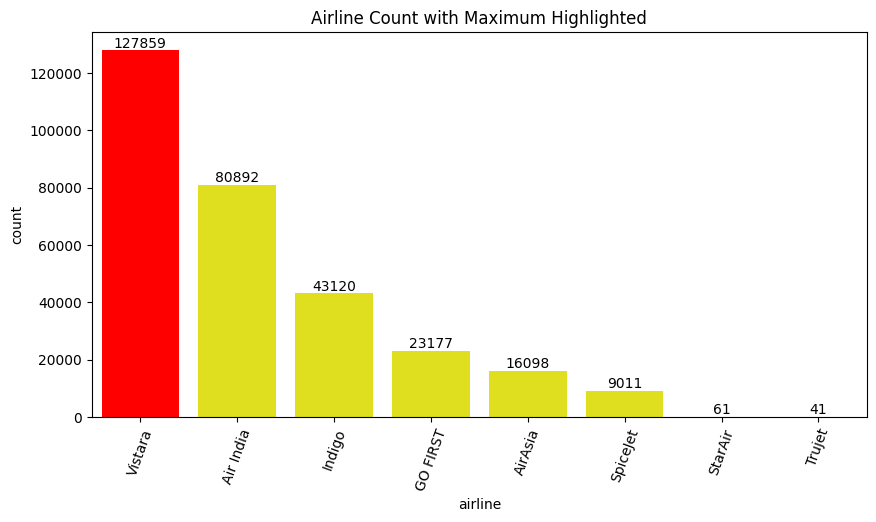

In [32]:
route_counts = flight_df['route'].value_counts()

# Identify the route with the maximum count
max_route = flight_df.airline.value_counts().idxmax()
max_count = flight_df.airline.value_counts().max()

# Create the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='airline', data=flight_df, order=flight_df.airline.value_counts().index, color="yellow")

# Highlight the max bar
for p in ax.patches:
    if p.get_height() == max_count:  
        p.set_facecolor("red")  
for i in ax.containers:
    ax.bar_label(i)

plt.title("Airline Count with Maximum Highlighted")
plt.xticks(rotation=70)
plt.show()

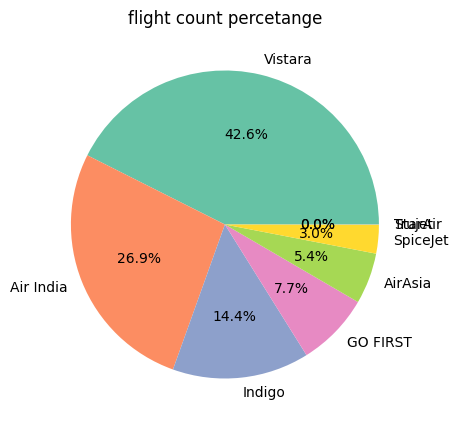

In [33]:
airline= flight_df['airline'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(airline, labels=airline.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(airline)))

plt.title("flight count percetange")
plt.show()


## **Insights :** 
-  ### Vistara, operating the highest number of flights, is ranked first.
-  ### While TruJet has the lowest and appears last."

In [34]:
flight_df['class'].value_counts()

class
economy     206772
business     93487
Name: count, dtype: int64

### **2. Price Distribution by Airline and Class.**

In [35]:
avgprices=flight_df.groupby(['airline', 'class'])['price'].mean().reset_index().round(2)
avgprices.sort_values(by='price',ascending=False)

,airline,class,price
8,Vistara,business,56309.20
0,Air India,business,47838.00
9,Vistara,economy,7885.02
1,Air India,economy,7386.84
5,SpiceJet,economy,6241.05
3,GO FIRST,economy,5708.46
4,Indigo,economy,5377.49
6,StarAir,economy,4982.02
2,AirAsia,economy,4132.03
7,Trujet,economy,3277.10


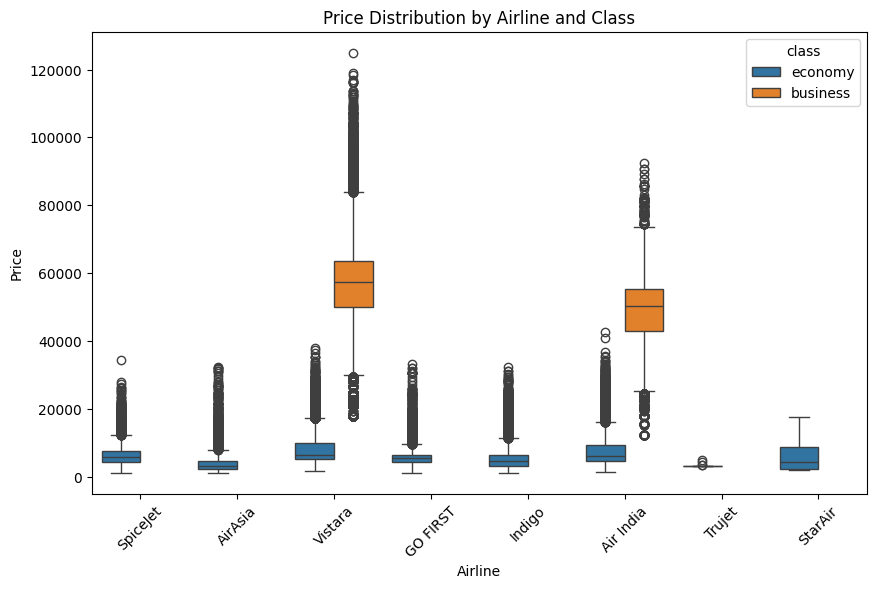

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=flight_df, x='airline', y='price', hue='class')
plt.title('Price Distribution by Airline and Class')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

In [37]:
len(flight_df.route.value_counts().index)

30

## **Insights :** 
-  ### From this vistara dominates both economy and business.
-  ### For a more accurate analysis, we need to consider the route as well. However, with 30 different routes, a deeper analysis is required."


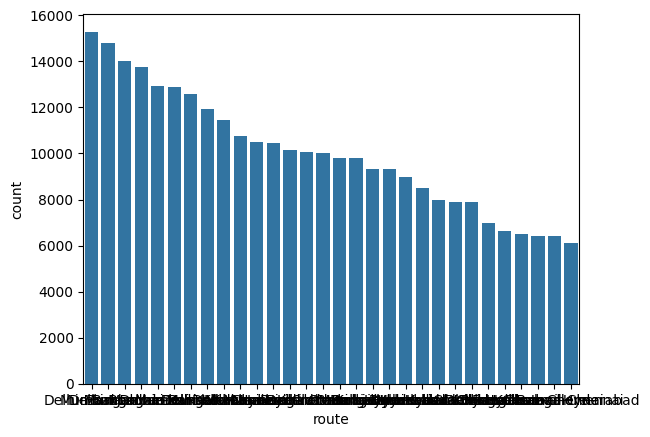

In [38]:
sns.countplot(flight_df,x='route',order=flight_df.route.value_counts().index)
plt.show()

### From this, we select the top 5 busiest routes and plot them accordingly.

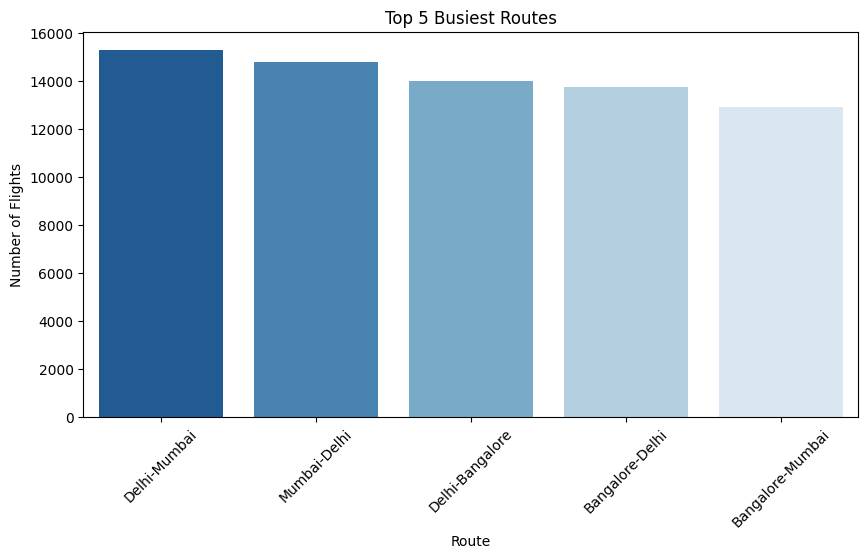

In [39]:
# Compute value counts once and store it
route_counts = flight_df.route.value_counts()

# Plot using the stored value counts
plt.figure(figsize=(10,5))
sns.barplot(x=route_counts.head(5).index, y=route_counts.head(5).values, hue=route_counts.head(5).index,palette="Blues_r")
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.title("Top 5 Busiest Routes")
plt.xticks(rotation=45)
plt.show()

### Analysing Based on these routes

In [40]:
top_routes = flight_df['route'].value_counts().head(5).index

# Filter dataset to include only top 5 routes
filtered_df = flight_df[flight_df['route'].isin(top_routes)]

# Compute average price grouped by route first, then airline and class
avgprices = (
    filtered_df.groupby(['route', 'airline', 'class'])['price']
    .mean()
    .reset_index()
    .round(2)
)

# Sort by route first, then by price in descending order
avgprices = avgprices.sort_values(by=['route', 'price'], ascending=[True, False])

avgprices.head()

,route,airline,class,price
6,Bangalore-Delhi,Vistara,business,51918.56
0,Bangalore-Delhi,Air India,business,41218.22
5,Bangalore-Delhi,SpiceJet,economy,6970.73
1,Bangalore-Delhi,Air India,economy,6855.78
7,Bangalore-Delhi,Vistara,economy,6570.47


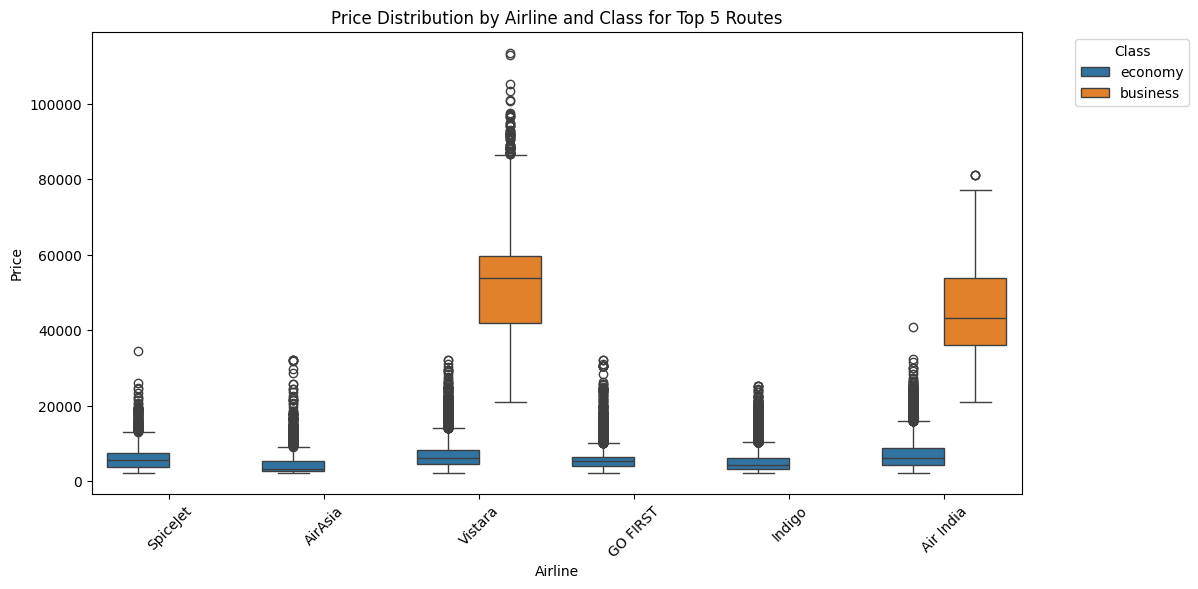

In [41]:
# Get top 5 busiest routes

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='airline', y='price', hue='class')
plt.title('Price Distribution by Airline and Class for Top 5 Routes')
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Price')

plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.show()


## **Insights :**
- ###  **Vistara** leads in **Business Class pricing**, consistently having the highest fares across routes.  
- ###  **AirAsia and Indigo** dominate **low-cost travel**, offering the most affordable Economy fares.  
- ###  **Route pricing trends** indicate that **Mumbai-Delhi and Delhi-Mumbai** have slightly lower fares than Bangalore routes.


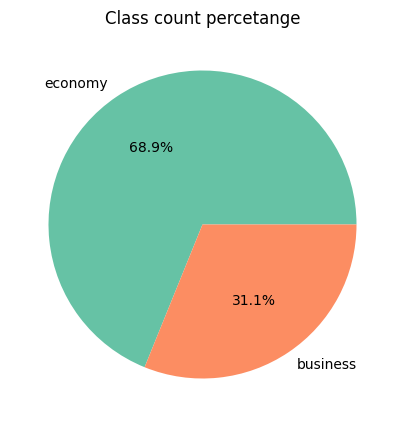

In [42]:
class_counts = flight_df['class'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(class_counts)))

plt.title("Class count percetange")
plt.show()


In [43]:
df_economy = flight_df[flight_df["class"] == "economy"] # Filter only economy class

busiest_routes = df_economy["route"].value_counts().nlargest(5).index 

df_busiest = df_economy[df_economy["route"].isin(busiest_routes)] # Filter for only the top 5 busiest routes

mean_prices = df_busiest.groupby(["route", "airline"])["price"].mean().reset_index() # Filter for only the top 5 busiest routes

mean_prices = mean_prices.sort_values(by=["route", "price"])
best_airlines = mean_prices.groupby("route").head(2) # lowest and second-lowest price for each route
best_airlines


,route,airline,price
1,Bangalore-Delhi,AirAsia,4855.132221
2,Bangalore-Delhi,GO FIRST,5579.936376
7,Delhi-Bangalore,AirAsia,5369.578438
8,Delhi-Bangalore,GO FIRST,5716.999328
13,Delhi-Mumbai,AirAsia,4020.893987
15,Delhi-Mumbai,Indigo,4518.508454
21,Mumbai-Delhi,Indigo,3974.526962
19,Mumbai-Delhi,AirAsia,4065.704698
25,Mumbai-Kolkata,AirAsia,4017.429806
26,Mumbai-Kolkata,GO FIRST,6167.523478


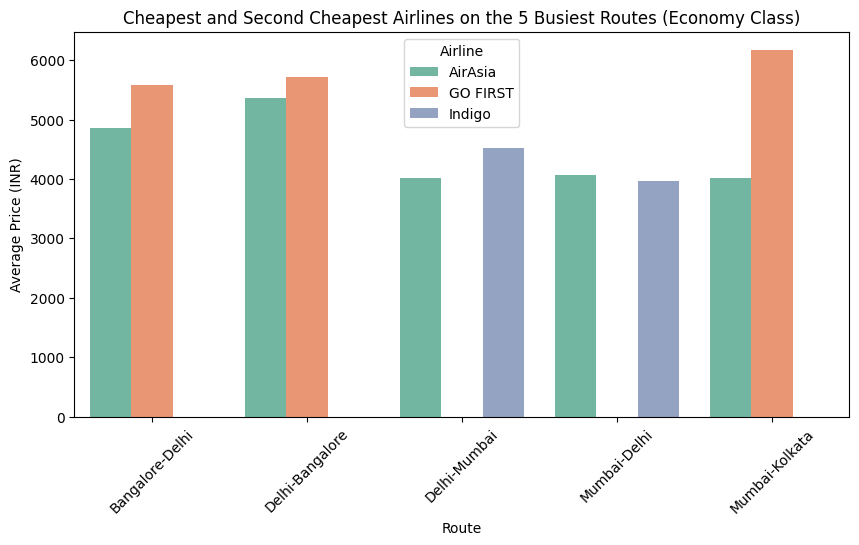

In [44]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="route", y="price", hue="airline", data=best_airlines, palette="Set2")

# Formatting the chart
plt.title("Cheapest and Second Cheapest Airlines on the 5 Busiest Routes (Economy Class)")
plt.xlabel("Route")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.legend(title="Airline")
plt.show()



## **Insights :**
- ### **AirAsia is the best choice for budget travelers as it has the lowest economy fares on 4 of the 5 busiest routes: Bangalore-Delhi, Delhi-Bangalore, Delhi-Mumbai, and Mumbai-Delhi.**

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="route", y="duration", data=top_route_df)
plt.title("Distribution of Flight Duration by Route")
plt.xlabel("Route")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



NameError: name 'top_route_df' is not defined

<Figure size 1200x600 with 0 Axes>

- ### **There are many outliers in the duration, which may be caused by the number of stops.**

In [ ]:
sns.boxplot(x="route", y="duration", data=top_route_df, hue="stops", palette="coolwarm")

plt.title("Distribution of Flight Duration by Route (Grouped by Stops)")
plt.xlabel("Route")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Stops")
plt.grid(axis="y", linestyle="--", alpha=0.7)

## **Insights :**
- ### **outliers detected!**
- ### **It's likely due to long layovers, operational delays, or indirect routes.**
- ### **Non-stop flights generally have the lowest and most consistent durations..**

In [ ]:
flight_df.head()

## Analysis based on flight time

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#Countplot for Departure
sns.countplot(x="Departure", data=flight_df, hue="Departure", palette="coolwarm", ax=axes[0])
axes[0].set_title("Count of Flights by Departure Time")
axes[0].set_xlabel("Departure Time")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

#Countplot for Arrival
sns.countplot(x="Arrival", data=flight_df, hue="Arrival", palette="coolwarm", ax=axes[1])
axes[1].set_title("Count of Flights by Arrival Time")
axes[1].set_xlabel("Arrival Time")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.ylabel("Count")
plt.show()

## **Insights :**
-  ### **Most departures are during 5AM-12PM.**
-  ### **Night and morning arrivals occur at a similar frequency.**